In [75]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import torch
import torch.nn as nn

%matplotlib tk

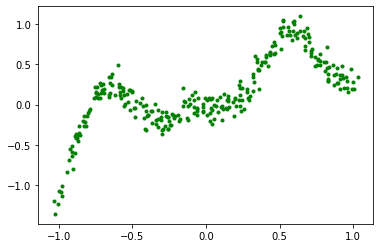

In [76]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise

x = x*2
x = x - x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
xx = torch.Tensor(xx)
yy = torch.Tensor(xx)

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

In [77]:
torch.manual_seed(123)
net = nn.Sequential(nn.Linear(1,1), nn.LeakyReLU(0.2), nn.Linear(1,1))
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

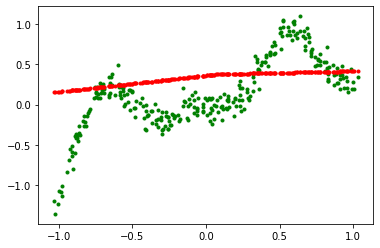

In [78]:
%matplotlib inline
yout = net(xx)
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.data.reshape(-1), marker='.', color='r')

In [79]:
net[0].weight.data, net[0].bias.data

(tensor([[-0.4078]]), tensor([0.0331]))

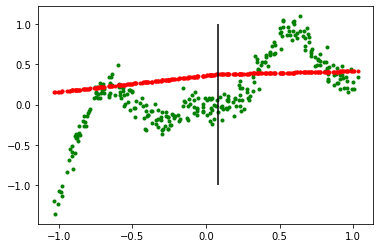

In [80]:
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.data.reshape(-1), marker='.', color='r')
plt.vlines([0.0331/0.4078], 1, -1)

In [81]:
net[2].bias.data

tensor([0.3771])

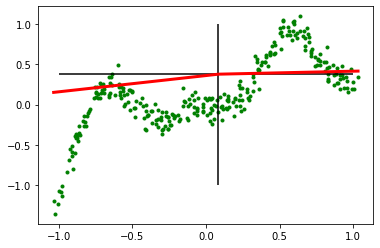

In [82]:
plt.scatter(x, y, marker='.', color='g')
plt.plot(x, yout.data.reshape(-1), color='r', lw=3)
plt.vlines([0.0331/0.4078], -1, 1)
plt.hlines([0.3771], -1, 1)

## 2D

In [83]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
# X1 = np.linspace(-2.5, 0, num_points)
X2 = np.linspace(-2, 4, num_points)
# X2 = np.linspace(-2, 2, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1
# Y = -Y

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

xx = torch.Tensor(np.c_[x1, x2])
yy = torch.Tensor(Y.reshape(-1,1))

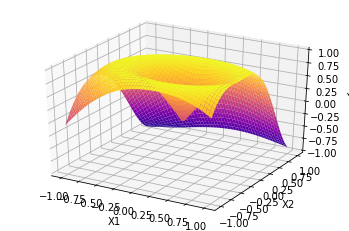

In [84]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [242]:
torch.manual_seed(54)
net2 = nn.Sequential(
        nn.Linear(2,2),
        nn.LeakyReLU(0.5),
        nn.Linear(2,2)
)

net2[2].weight.data[:2,:2] = torch.Tensor([[1, 0.5],[0.5,-1]])
net2[0].weight.data[:2,:2] = torch.Tensor([[1, -0.5], [-0.5, -0.5]])

In [243]:
net2[2].weight, net2[0].weight

(Parameter containing:
 tensor([[ 1.0000,  0.5000],
         [ 0.5000, -1.0000]], requires_grad=True), Parameter containing:
 tensor([[ 1.0000, -0.5000],
         [-0.5000, -0.5000]], requires_grad=True))

In [244]:
%matplotlib tk

with torch.no_grad():
    yout = net2(xx)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, yout[:,0].numpy().reshape(X1.shape), cmap='plasma')
ax.plot_surface(X1, X2, yout[:,1].numpy().reshape(X1.shape), cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.pause(10)
# plt.show()

TclError: can't invoke "update" command: application has been destroyed

In [231]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(yout[:,0].numpy().reshape(X1.shape),
                yout[:,1].numpy().reshape(X1.shape),
                X1,
                cmap='plasma')
ax.plot_surface(yout[:,0].numpy().reshape(X1.shape),
                yout[:,1].numpy().reshape(X1.shape),
                X2,
                cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.pause(10)
# plt.show()

TclError: can't invoke "update" command: application has been destroyed

In [245]:
with torch.no_grad():
    a1 = net2[1](net2[0](xx))[:,0]
print(torch.sort(a1[a1 >= 0.]))

torch.return_types.sort(
values=tensor([0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125,
        0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125,
        0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0329, 0.0329,
        0.0329, 0.0329, 0.0329, 0.0329, 0.0329, 0.0329, 0.0329, 0.0329, 0.0329,
        0.0329, 0.0329, 0.0329, 0.0329, 0.0329, 0.0329, 0.0329, 0.0329, 0.0329,
        0.0329, 0.0329, 0.0329, 0.0329, 0.0329, 0.0533, 0.0533, 0.0533, 0.0533,
        0.0533, 0.0533, 0.0533, 0.0533, 0.0533, 0.0533, 0.0533, 0.0533, 0.0533,
        0.0533, 0.0533, 0.0533, 0.0533, 0.0533, 0.0533, 0.0533, 0.0533, 0.0533,
        0.0533, 0.0533, 0.0533, 0.0737, 0.0737, 0.0737, 0.0737, 0.0737, 0.0737,
        0.0737, 0.0737, 0.0737, 0.0737, 0.0737, 0.0737, 0.0737, 0.0737, 0.0737,
        0.0737, 0.0737, 0.0737, 0.0737, 0.0737, 0.0737, 0.0737, 0.0737, 0.0737,
        0.0737, 0.0941, 0.0941, 0.0941, 0.0941, 0.0941, 0.0941, 0.0941, 0.0941,
        

In [246]:
ind = torch.nonzero(torch.bitwise_and(a1 >=0, a1<0.05))
edge = yout[ind.reshape(-1)]
xxe = xx[ind.reshape(-1)]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(yout[:,0].numpy().reshape(X1.shape),
                yout[:,1].numpy().reshape(X1.shape),
                X1,
                cmap='plasma')
# ax.plot_surface(yout[:,0].numpy().reshape(X1.shape),
#                 yout[:,1].numpy().reshape(X1.shape),
#                 X2,
#                 cmap='viridis')
ax.scatter(edge[:,0], edge[:,1], xxe[:,0]*0)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.pause(10)
# plt.show()

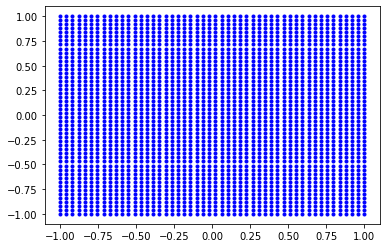

In [396]:
%matplotlib inline
plt.scatter(X1, X2, marker='.', c='b')

In [438]:
torch.manual_seed(77733)

net2 = nn.Sequential(
        nn.utils.spectral_norm(nn.Linear(2,5)),
        nn.LeakyReLU(0.1),
        nn.utils.spectral_norm(nn.Linear(5,2))
)

# net2[2].weight.data[:2,:2] = torch.Tensor([[1, 0.5],[0.5,-1]])
# net2[0].weight.data[:2,:2] = torch.Tensor([[1, -0.5], [-0.5, -0.5]])

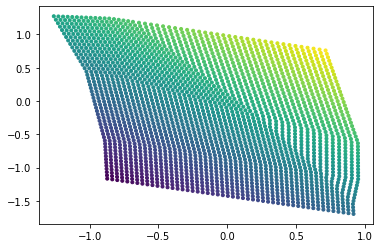

In [460]:
### this is for sure invertible.
for i in range(10):
    with torch.no_grad():
        yout = net2(xx)+xx
#         yout = net2(xx)


%matplotlib inline
y1, y2 = yout[:,0].numpy().reshape(X1.shape), yout[:,1].numpy().reshape(X1.shape)
plt.scatter(y1, y2, marker='.', c=yout.sum(axis=1))

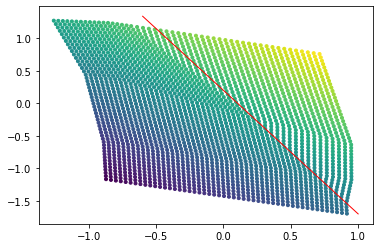

In [440]:
plt.scatter(y1, y2, marker='.', c=yout.sum(axis=1))

##### db 1
m, c = -1.9, 0.2
x = np.array([-0.6, 1.0])
y = m*x+c
plt.plot(x, y, c='r', lw=1)

In [323]:
net2[2].bias.data

tensor([ 0.5685, -0.5171])

In [325]:
# w1 = tensor([[ 0.5522,  0.2927],
#         [ 0.0341, -0.6373]])

# b1 = tensor([0.1866, 0.0487])

# LeakyRelu(0.5)

# w2 = tensor([[ 0.1183,  0.7039],
#         [-0.6091,  0.4634]])

# b2 = tensor([ 0.5685, -0.5171])

In [461]:
a = np.eye(2)

In [462]:
np.linalg.svd(a)

(array([[1., 0.],
        [0., 1.]]), array([1., 1.]), array([[1., 0.],
        [0., 1.]]))